<a href="https://colab.research.google.com/github/Hollykid10/Employee-Churn/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [ ]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

In [103]:
employee = pd.read_csv("hr_employee_churn_data.csv")
employee.head(5)

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [104]:
employee.shape

(14999, 10)

In [105]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   empid                  14999 non-null  int64  
 1   satisfaction_level     14997 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


In [109]:
employee.isnull().sum()

,0
empid,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
promotion_last_5years,0
salary,0
left,0


In [106]:
print(employee.duplicated().any())

False


**Data PreProcessing**

In [107]:
# Drop null row
employee.dropna(subset="satisfaction_level", axis=0, inplace=True)

**Data Analysis**

In [108]:
employee.describe()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000
mean,7500.998733,0.612863,0.716128,3.803294,201.057411,3.498300,0.144629,0.021271,0.237981
std,4329.407522,0.248634,0.171165,1.232499,49.942638,1.460222,0.351738,0.144291,0.425862
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,3752.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,7501.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,11250.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


<Axes: >

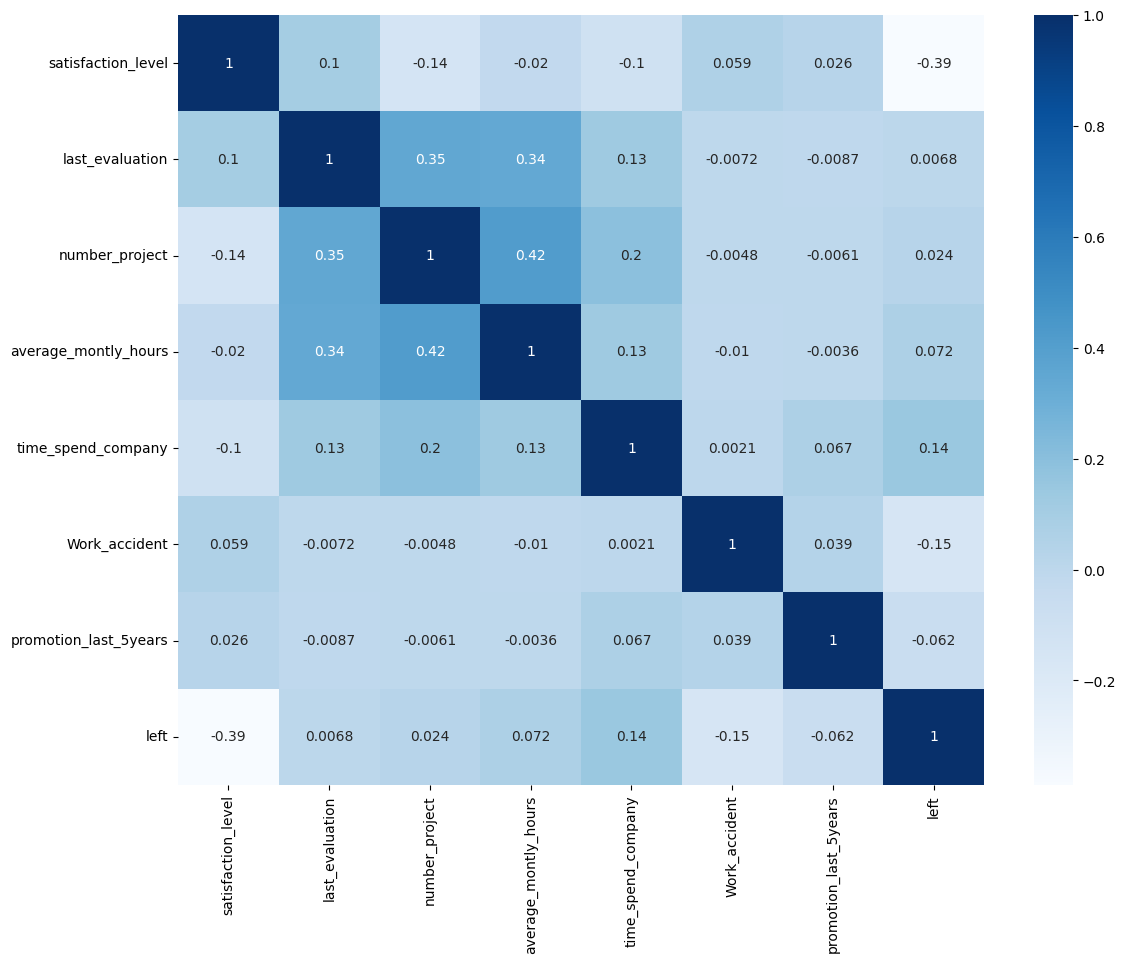

In [ ]:
plt.figure(figsize=(13, 10))
correlation = customer[["satisfaction_level",	"last_evaluation",	"number_project",	"average_montly_hours",	"time_spend_company",	"Work_accident",	"promotion_last_5years",	"left"]].corr()
sns.heatmap(correlation, annot=True, cmap="Blues")

In [ ]:
correlation["left"].sort_values(ascending = False)


,left
left,1.000000
time_spend_company,0.144936
average_montly_hours,0.071561
number_project,0.024145
last_evaluation,0.006843
promotion_last_5years,-0.061766
Work_accident,-0.154558
satisfaction_level,-0.388269


In the plot above, Satisfaction level have the highest correlation(negative), indicating as the satisafaction level of worker increases, the number of workers leaving decreases. In other words, employees who are more satisfy are less likely to leave the company.


**Distribution of variables in the dataset**

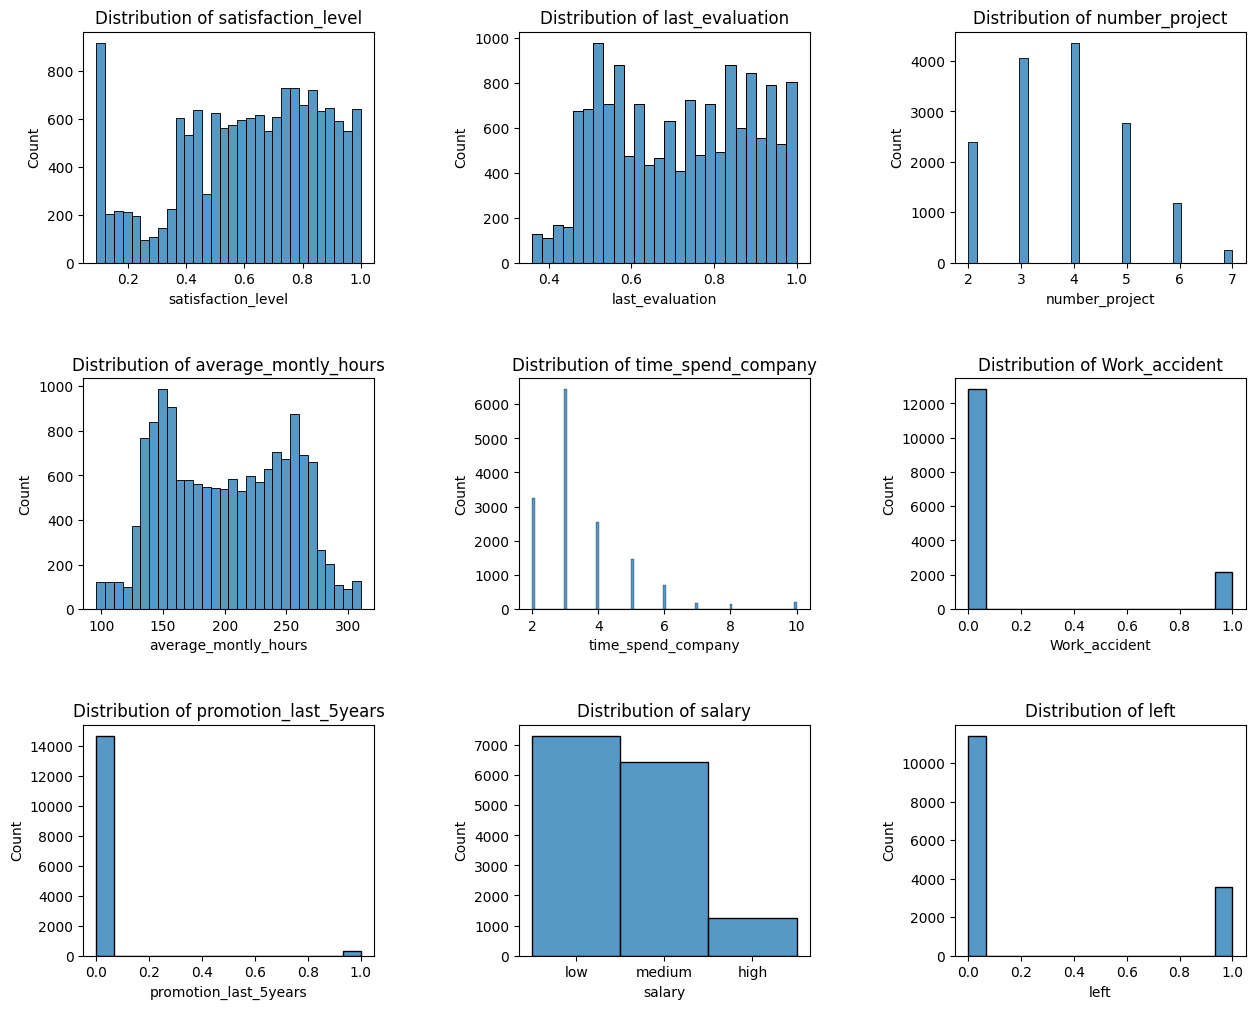

In [110]:

plt.figure(1, figsize=(15, 12))
n = 0
for i in ["satisfaction_level", "last_evaluation",	"number_project",	"average_montly_hours", "time_spend_company", 	"Work_accident",	"promotion_last_5years",	"salary", "left"]:
  n += 1
  plt.subplot(3,3, n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.histplot(employee[i])
  plt.title(f"Distribution of {i}")
plt.show()

**Proportion of Workers Who Left by Salary Category**

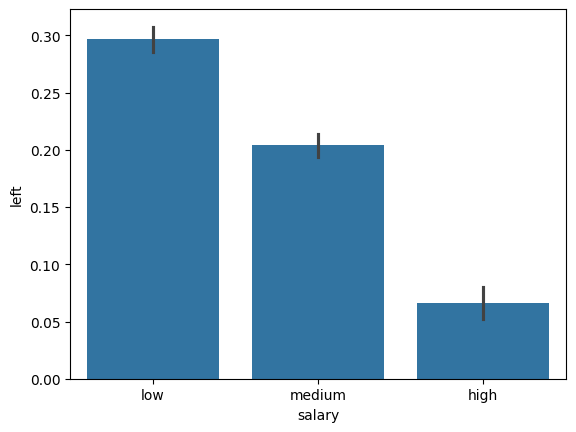

In [ ]:
sns.barplot(data=employee, x="salary", y="left")
plt.show()

The plot above indicate low salary earner left most, follow by medium,and then high salary earner most likely stay.

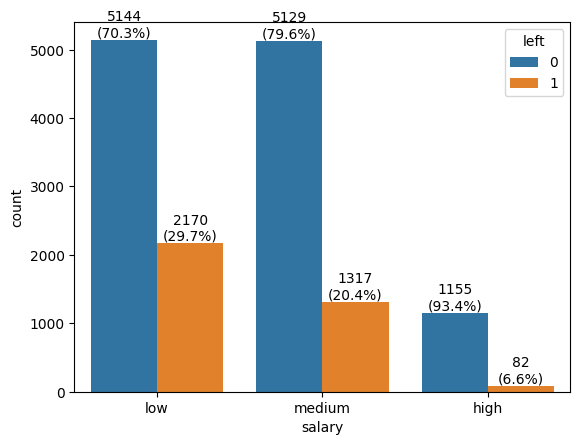

In [111]:
feat = "salary"
hue = "left"
hue_type = employee[hue].dtype.type
groups = employee[feat].unique()
proportions = employee.groupby(feat)[hue].value_counts(normalize=True)
ax = sns.countplot(data=employee, x=feat, hue=hue)

for i, j in enumerate(ax.containers):
  heights = [p.get_height()  for p in j]
  labels = [f"{int(h)}\n({proportions.loc[g, i]:.1%})" for g, h in zip(groups, heights)]
  ax.bar_label(j, labels)
plt.show()

**Proportion of Workers Who Left by Promotion in Last Five Years**

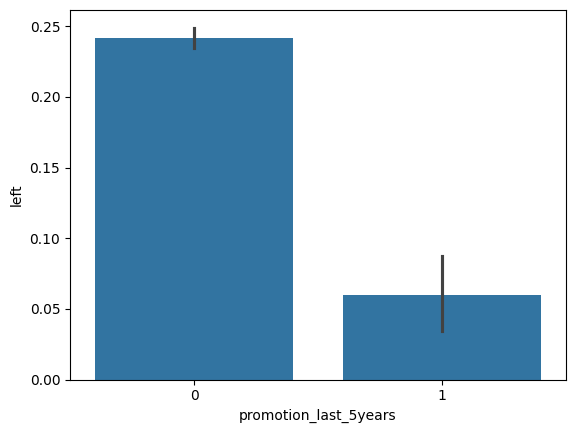

In [112]:
sns.barplot(data=employee, x="promotion_last_5years" , y="left")
plt.show()

From our plot, we can observe that workers who received a promotion in the last five years are at least 3 times more likely to stay than those who did not receive a promotion.

**Proportion of Workers who left by work accident status**

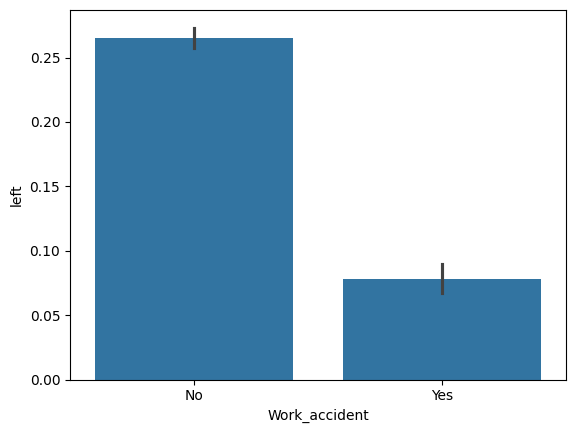

In [113]:
sns.barplot(data=employee, x="Work_accident", y="left")
plt.xticks(ticks=[0,1], labels=["No", "Yes"])
plt.show()

The numbers of workers that left due to work accident is low and this make sense since they might not have much option due to injury sustain at work.

**Correlation between number of projects and promotion last 5years**

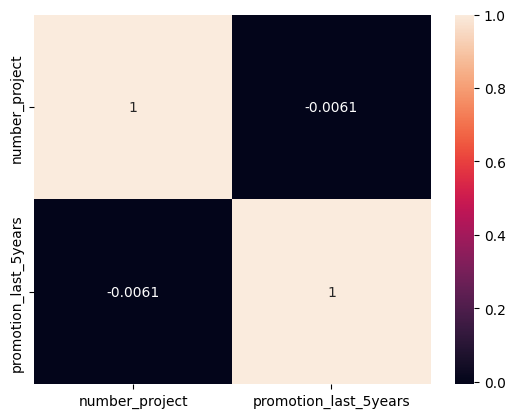

In [114]:
correlate = employee[["number_project", "promotion_last_5years"]].corr()
sns.heatmap(correlate, annot=True)
plt.show()

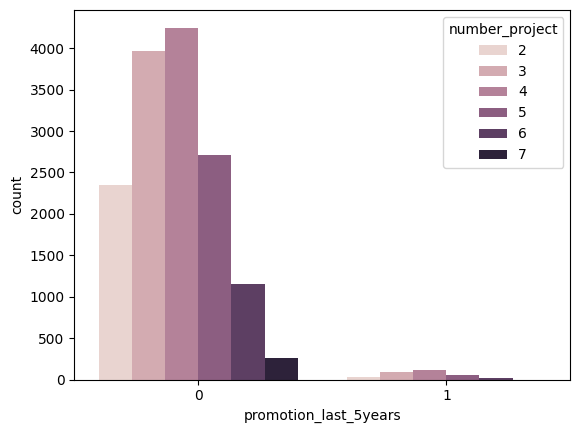

In [115]:
sns.countplot(data=employee, x="promotion_last_5years", hue="number_project")
plt.show()

The plots above shows slight correlation between number of projects and workers that got promotion in last 5years, Indicating workers who got promoted last five years were promoted with different criteria other than number of projects.

**Correlation between satisfaction level and average monthly hour and promotion in last five years.**

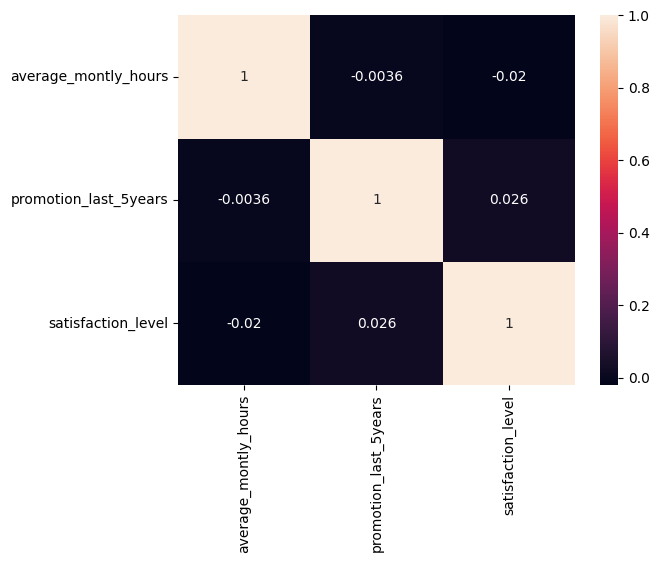

In [116]:
correlate_sl = employee[["average_montly_hours", "promotion_last_5years", "satisfaction_level",]].corr()
sns.heatmap(correlate_sl, annot=True)
plt.show()

The plot above shows very little correlation between satisfaction level, average_monthly_hours and promotion last 5years.

In [117]:
correlate_sl["satisfaction_level"].sort_values()

,satisfaction_level
average_montly_hours,-0.020176
promotion_last_5years,0.025589
satisfaction_level,1.000000


**Proportion of workers who left by satisfaction level**

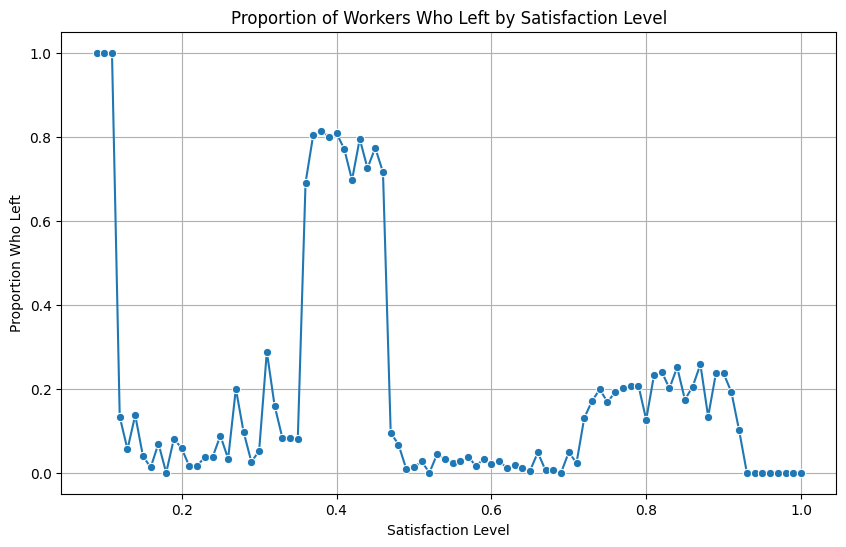

In [118]:
proportion = employee.groupby('satisfaction_level')['left'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=proportion, x='satisfaction_level', y='left', marker='o')
plt.title('Proportion of Workers Who Left by Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Proportion Who Left')
plt.grid(True)
plt.show()

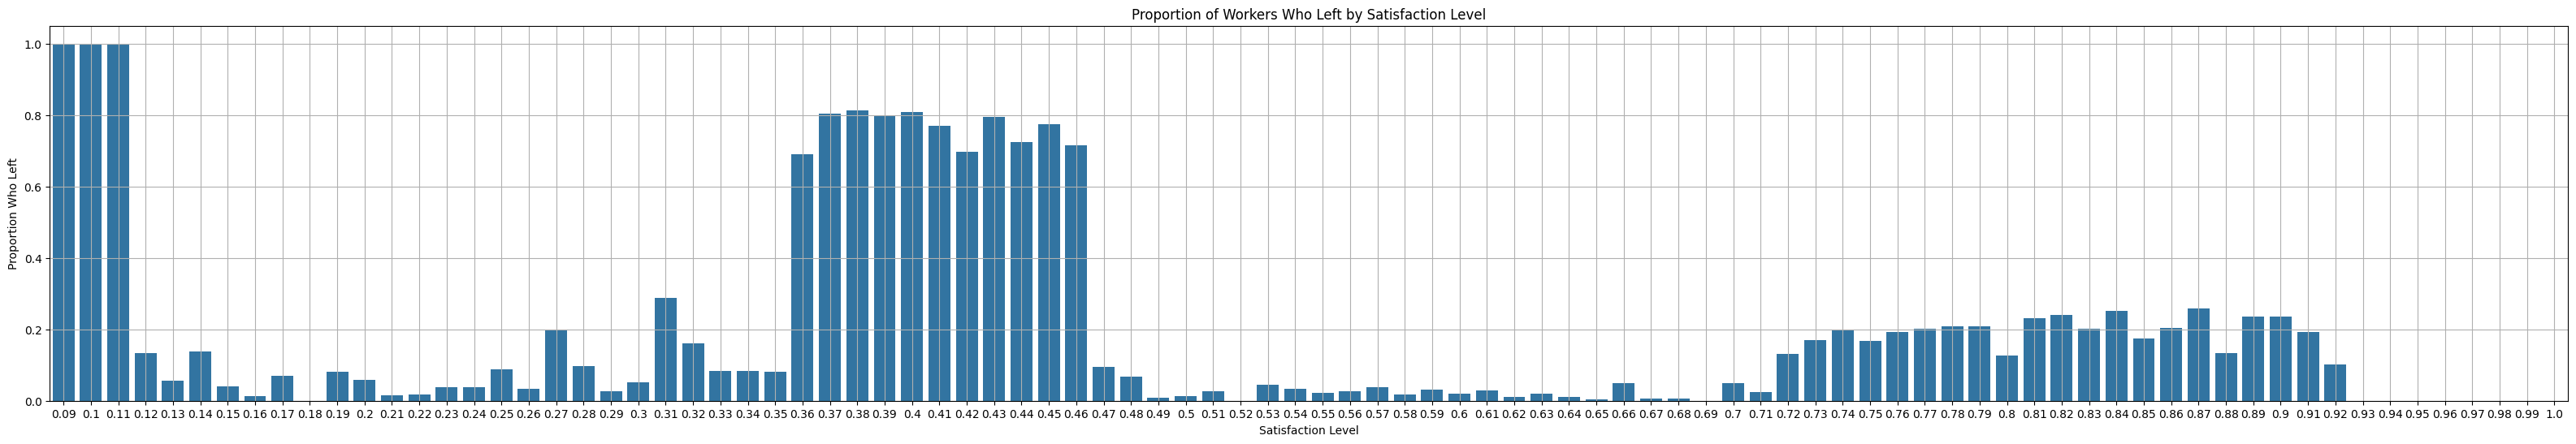

In [119]:
plt.figure(figsize=(40, 6))
sns.barplot(data=proportion, x='satisfaction_level', y='left')
plt.title('Proportion of Workers Who Left by Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Proportion Who Left')
plt.grid(True)
plt.show()

**Correlation and Average Satisfaction Level of Workers Who Left and Stayed**

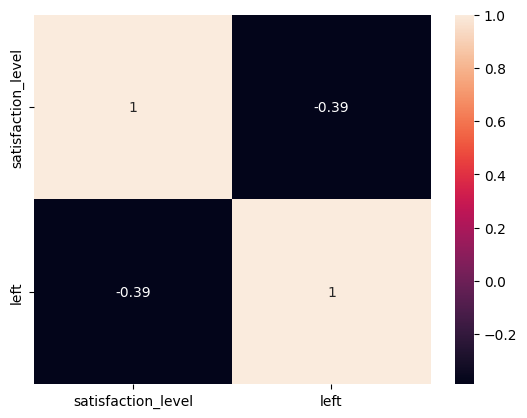

In [120]:
sns.heatmap(employee[["satisfaction_level", "left"]].corr(), annot=True)
plt.show()

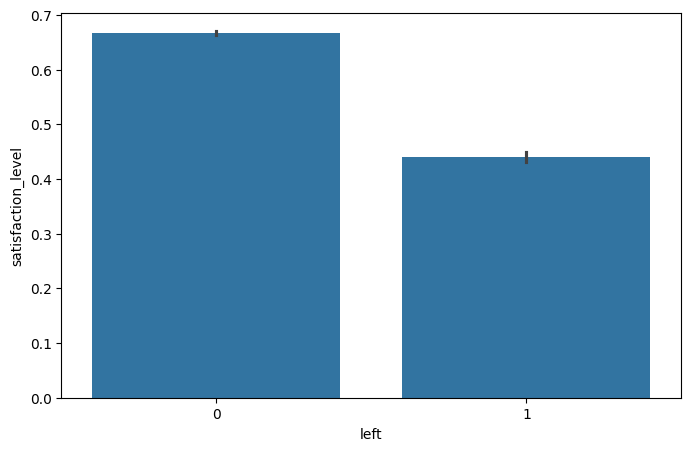

In [121]:
plt.figure(figsize=(8, 5))
sns.barplot(data=employee, x="left", y="satisfaction_level")

plt.show()

The plot shows that workers that stays have everage of 0.68 satisfaction_level while worker that left have average of 0.45 satisfaction_level indicating workers with high satisfaction_level stays.

**Convert to Dummy variable**

In [124]:
salary_dummy = pd.get_dummies(employee["salary"], dtype="int")
employee_df = pd.concat([employee, salary_dummy], axis=1)

In [125]:
employee_df.head(5)

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,high,low,medium
0,1,0.38,0.53,2,157,3,0,0,low,1,0,1,0
1,2,0.80,0.86,5,262,6,0,0,medium,1,0,0,1
2,3,0.11,0.88,7,272,4,0,0,medium,1,0,0,1
3,4,0.72,0.87,5,223,5,0,0,low,1,0,1,0
4,5,0.37,0.52,2,159,3,0,0,low,1,0,1,0


**Splitting our data into x features and y target variables.**

In [126]:
x = employee_df.drop(columns=["empid", "left", "salary"], axis=1)
y = employee_df["left"]

**Comparing the models with different hyperparameter values using gridsearch.**

In [127]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [128]:
models_list = [LogisticRegression(max_iter=1000), RandomForestClassifier()]

In [129]:
print(x.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',
       'time_spend_company', 'Work_accident', 'promotion_last_5years', 'high', 'low', 'medium'],
      dtype='object')


In [130]:
# Model Hyperparameter

models_hyperparameter = {
    "log_hyperparameter" : {
        "C" : [0.001, 0.01, 0.1],
        "penalty" : ["l2"]
    },
    "forest_hyperparameter" : {
    "n_estimators":[5, 10, 20, 50]


    }
}

In [131]:
print(models_hyperparameter.keys())

dict_keys(['log_hyperparameter', 'forest_hyperparameter'])


In [133]:
key_list = list(models_hyperparameter.keys())
print(key_list)
print(key_list[0])


['log_hyperparameter', 'forest_hyperparameter']
log_hyperparameter


In [134]:
print(models_hyperparameter["log_hyperparameter"])

{'C': [0.001, 0.01, 0.1], 'penalty': ['l2']}


In [135]:
def selection_of_model(list_of_models, hyperparameters_dictionary):
  result = []
  i = 0
  for model in list_of_models:
    key = key_list[i]
    params = models_hyperparameter[key]
    i += 1
    print(model)
    print(params)
    classifier = GridSearchCV(model, params, cv=3)
    classifier.fit(x, y)
    result.append({
        "model used" : model,
        "highest score" : classifier.best_score_,
        "best hyperparameter" : classifier.best_params_
    })
  result_df = pd.DataFrame(result, columns=["model used", "highest score", "best hyperparameter"])
  print(result_df)
selection_of_model(models_list, models_hyperparameter)

LogisticRegression(max_iter=1000)
{'C': [0.001, 0.01, 0.1], 'penalty': ['l2']}
RandomForestClassifier()
{'n_estimators': [5, 10, 20, 50]}
                          model used  highest score          best hyperparameter
0  LogisticRegression(max_iter=1000)       0.750550  {'C': 0.1, 'penalty': 'l2'}
1           RandomForestClassifier()       0.990265         {'n_estimators': 50}


**Random Forest is the model that gives the highest score so we use it**

In [136]:
best_model = RandomForestClassifier(n_estimators=20)
best_model.fit(x, y)

RandomForestClassifier(n_estimators=20)

In [137]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [138]:
training_predict = best_model.predict(x_train)
training_accuracy = accuracy_score(training_predict, y_train)
print(training_accuracy)

0.9994165207968659


In [139]:
testing_predict = best_model.predict(x_test)
testing_accuracy = accuracy_score(testing_predict, y_test)
print(testing_accuracy)

0.999


**Summary**


**In this machine learning project, In this project, I analyzed employee churn data, starting with data exploration, cleaning, and visualization using Python libraries like pandas, seaborn, and matplotlib.I learned how to analyze the dataset in different ways, and also visualize the dataset to know the details of the dataset and find the relation between different columns. I used dummy variables to encode categorical data and trained two machine learning models: LogisticRegression and RandomForestClassifier. Hyperparameter tuning was performed using GridSearchCV to improve model performance. Finally, the model was evaluated using training and testing accuracy, providing insights into its ability to predict employee churn.**
